<a href="https://colab.research.google.com/github/arnavaj23/Multivariate_timeseries_forecasting/blob/main/LSTM/AirPollution/AirPollutionMultivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%d-%m-%Y %H:%M:%S')

dataset = pd.read_csv(
    'LSTM-Multivariate_pollution.csv',
    parse_dates=['date'],
    date_parser=parse
)

dataset.set_index('date', inplace=True)
print(dataset.head())


In [ ]:
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
# Data cleaning


dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:] # drop the first day
print(dataset.head(5))
dataset.to_csv('pollution.csv') # save new CSV

/tmp/ipython-input-17-3123590673.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['pollution'].fillna(0, inplace=True)


                     pollution  dew  temp  pressure w_dir  w_speed  snow  rain
date                                                                          
2010-01-05 00:00:00       30.0  -26 -17.0    1035.0    NW   201.58     0     0
2010-01-05 01:00:00       34.0  -26 -18.0    1035.0    NW   205.60     0     0
2010-01-05 02:00:00       27.0  -26 -19.0    1035.0    NW   208.73     0     0
2010-01-05 03:00:00       25.0  -27 -18.0    1035.0    NW   213.65     0     0
2010-01-05 04:00:00       28.0  -27 -19.0    1035.0    NW   218.57     0     0


In [ ]:
# load dataset
df = pd.read_csv('pollution.csv', header=0, index_col=0)
df.describe()

,pollution,dew,temp,pressure,w_speed,snow,rain
count,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000
mean,94.027740,1.853206,12.493368,1016.432217,23.820061,0.044685,0.195344
std,92.305722,14.426366,12.173469,10.271902,49.980707,0.657973,1.417391
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,133.000000,15.000000,23.000000,1025.000000,21.900000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,23.000000,36.000000


In [ ]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

In [ ]:
df

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
date,,,,,,,,
2010-01-05 00:00:00,30.0,-26,-17.0,1035.0,NW,201.58,0,0
2010-01-05 01:00:00,34.0,-26,-18.0,1035.0,NW,205.60,0,0
2010-01-05 02:00:00,27.0,-26,-19.0,1035.0,NW,208.73,0,0
2010-01-05 03:00:00,25.0,-27,-18.0,1035.0,NW,213.65,0,0
2010-01-05 04:00:00,28.0,-27,-19.0,1035.0,NW,218.57,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


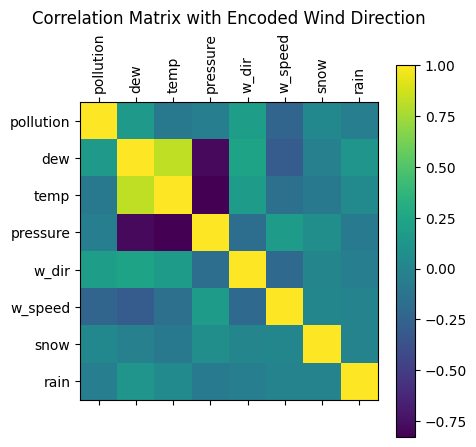

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded['w_dir'] = LabelEncoder().fit_transform(df_encoded['w_dir'])

plt.matshow(df_encoded.corr())
plt.xticks(range(len(df_encoded.columns)), df_encoded.columns, rotation=90)
plt.yticks(range(len(df_encoded.columns)), df_encoded.columns)
plt.colorbar()
plt.title("Correlation Matrix with Encoded Wind Direction")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (43724, 1)
X (43724, 4, 8)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (34964, 4, 8)
X_test (8760, 4, 8)
Y_train (34964, 1)
Y_test (8760, 1)


In [ ]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0034
Epoch 2/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0013
Epoch 3/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 9.2432e-04
Epoch 4/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.6635e-04
Epoch 5/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 9.3277e-04
Epoch 6/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.6735e-04
Epoch 7/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.0252e-04
Epoch 8/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 7.9550e-04
Epoch 9/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.0467e-04
Epoch 10/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.7147e-04
Epoch 11/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.0005e-04
Epoch 12/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.9016e-04
Epoch 13/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.3383e-04
Epoch 14/20
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms

In [ ]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.float64(0.02906036376953125)

In [ ]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (43728, 8)


In [ ]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [ ]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

np.float64(28.88600219910805)

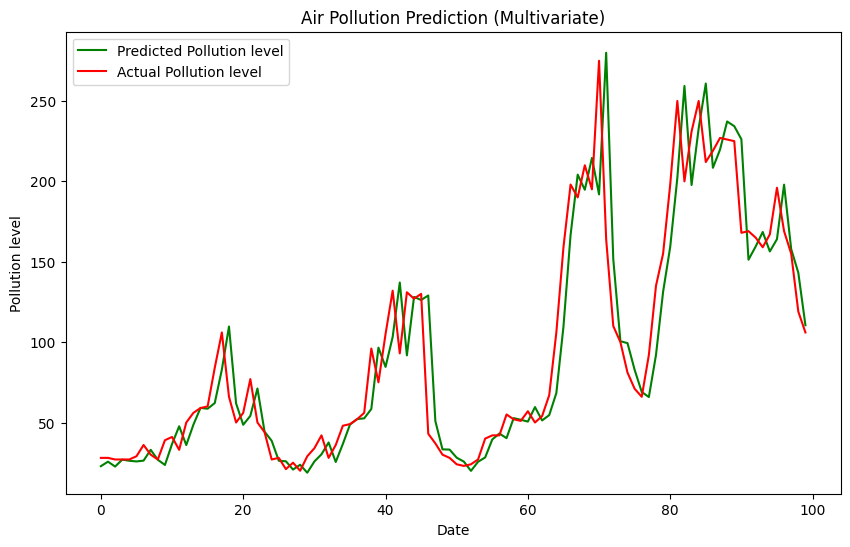

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100


mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE 22.817333


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

r2 = r2_score(Y_tested, Y_predicted)
print("R² score:", r2)

mse = mean_squared_error(Y_tested, Y_predicted)
print('Mean squared error', mse)

print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

R² score: 0.9035069942474365
Mean squared error 834.401123046875
RMSE 28.88600219910805
Mean of Test data  96.19201
